In [1]:
# Art and sports forums
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
sport_forums = [
    "Fitness", "bodybuilding", "running", "sports", "weightlifting", 
    "crossfit", "basketball", "soccer", "football", "baseball", "hockey", 
    "Boxing", "cycling", "tennis", "golf", "Swimming", "climbing", "surfing",
    "Fishing",    "tabletennis",    "tennis",    "physicaltherapy",    "Hanggliding",
    "snooker",    "ballroom",    "Croquet",    "lawnbowls",    "Handball",    "Cornhole",
    "pilates",    "tajiquan","volleyball","zumba", 
]
art_forums = [
    "ArtistLounge", "ArtCrit", "art", "learnart", "drawings", "Sculpture",
    "arttutorials", "AnimeART", "PixelArt", "Pastel", "OilPainting", "Watercolor", "artlounge", "painting",
     "writing", "writers", "sciwrite", "phd", "freelanceWriters", "composer", "composition"
]

not_creative_keywords = [
    "Burnout", "blocked", "creative block", "creative",
"Struggling", "difficulty", "can't",
"Lost", "losing", "lack",
"Stuck", "stagnant", "uninspired",
"Frustrated", "frustrating",
"Empty", "hollow",
"Overwhelmed", "discouraged", "demotivated",
"How to enjoy", "how to love again",
"Regain", "find again", "restart",
"Motivation", "inspiration",
"Start again", "back to", "return to",
"Find joy", "rediscover", "rekindle",
"Enjoy", "reconnect", "reengage",
"Sad", "frustrated", "bored",
"Not fun", "no joy", "tired",
"Lonely", "unsure", "defeated",
"Feel like giving up",
"How can I", "Why can’t I", "What do I do if",
"Help with", "Struggling to", "Can’t seem to",
"Art", "painting", "drawing", "illustrating",
"Writing", "poetry", "storytelling",
"Music", "composing", "creating",
"Crafting", "DIY", "making",
"Design", "photography", "acting",
"Lost motivation for [creative activity]",
"Can't seem to create anymore",
"How to start making art again",
"Struggling with creativity",
"Why do I feel stuck in [activity]?"
]
creative_keywords = [
    "Flow", "productive", "energized",
    "Inspired", "motivated", "excited",
    "Passionate", "dedicated", "focused",
    "Innovative", "original", "imaginative",
    "Empowered", "enthusiastic", "driven",
    "Creative spark", "lightbulb moment",
    "In the zone", "full of ideas",
    "Breakthrough", "progress", "momentum",
    "Fulfilled", "satisfied", "joyful",
    "Expressive", "playful", "free",
    "Exploring", "discovering", "experimenting",
    "Growing", "evolving", "learning",
    "Inventive", "visionary", "resourceful",
    "Crafting with purpose", "mastering",
    "Accomplished", "achieving goals",
    "Building", "designing", "making",
    "Creating", "writing", "painting",
    "Drawing", "sketching", "sculpting",
    "Storytelling", "writing poetry", "playing music",
    "Composing", "designing", "coding",
    "Photography", "filmmaking", "acting",
    "Hobbies", "crafts", "projects",
    "Collaboration", "sharing ideas", "brainstorming",
    "Unleashing creativity", "finding inspiration",
    "Seeing the world differently", "thinking outside the box",
    "Fresh perspective", "reimagining",
    "Making progress", "finishing projects",
    "Loving the process", "embracing the journey",
    "Discovering new techniques", "innovating",
    "Finding beauty", "expressing emotions",
    "Telling stories", "sharing experiences",
    "Artistic growth", "personal achievement",
    "Pursuing dreams", "bringing ideas to life",
    "Creative fulfillment", "expressing individuality",
    "Exploring new ideas", "trying something new",
    "Mastering skills", "overcoming challenges",
    "Feeling alive", "feeling accomplished",
    "Creative energy", "endless possibilities"
]
import pickle

# Load the .pkl file
with open( "art_posts.pkl", "rb") as file:
    art_posts = pickle.load(file)
with open( "art_posts_dic.pkl", "rb") as file:
    art_posts_dic = pickle.load(file)
with open( "art_users.pkl", "rb") as file:
    art_users = pickle.load(file)
with open( "filtered_art_posts.pkl", "rb") as file:
    filtered_art_posts = pickle.load(file)
with open( "filtered_sport_forums.pkl", "rb") as file:
    filtered_sport_forums = pickle.load(file)
with open( "filtered_sport_posts.pkl", "rb") as file:
    filtered_sport_posts = pickle.load(file)
with open( "sport_posts_dic.pkl", "rb") as file:
    sport_posts_dic = pickle.load(file)



In [2]:
import praw

# Reddit API credentials (replace with your own)
REDDIT_CLIENT_ID = "lMYhh7BNAjLrJQ_c7v0M5w"
REDDIT_CLIENT_SECRET = "Mq0R3nUw3FxCmfnqcLM4sIrLA1_dzg"
REDDIT_USER_AGENT = "your_user_agent"

# Initialize PRAW Reddit instance
reddit = praw.Reddit(client_id=REDDIT_CLIENT_ID,
                     client_secret=REDDIT_CLIENT_SECRET,
                     user_agent=REDDIT_USER_AGENT)

### Extracting unique users

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict



def get_top_posts(subreddit_name, limit=2000):
    """Fetch the top posts from a subreddit."""
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.top(limit=limit):
        posts.append({    'title': post.title,
    'description': post.selftext,
    'author': str(post.author),
    'post_id': post.id,
    'subreddit': str(post.subreddit),
    'score': post.score,
    'comments_count': post.num_comments,
    'post_url': post.url,
    'created_utc': post.created_utc,
    'flair': post.link_flair_text,
    'nsfw': post.over_18,
    'stickied': post.stickied,
    'edited': post.edited,
    'awards': post.total_awards_received,
    'is_video': post.is_video,
    'is_self': post.is_self,
    'media': post.media,
    'domain': post.domain,
    })
    return posts

def get_unique_users(posts):
    """Extract unique users from the posts."""
    return set(post['author'] for post in posts if post['author'] != 'None')


def find_users_in_sports_forums(users, sport_forums):
    """Check if users from art forums have posts in sports forums and extract those posts."""
    user_activity = defaultdict(list)
    
    for user in users:
        try:
            redditor = reddit.redditor(user)
            for post in redditor.submissions.new(limit=None):  # Fetch all posts by the user
                if str(post.subreddit).lower() in (forum.lower() for forum in sport_forums):
                    user_activity[user].append({
                        'title': post.title,
                        'description': post.selftext,
                        'author': str(post.author),
                        'post_id': post.id,
                        'subreddit': str(post.subreddit),
                        'score': post.score,
                        'comments_count': post.num_comments,
                        'post_url': post.url,
                        'created_utc': post.created_utc,
                        'flair': post.link_flair_text,
                        'nsfw': post.over_18,
                        'stickied': post.stickied,
                        'edited': post.edited,
                        'awards': post.total_awards_received,
                        'is_video': post.is_video,
                        'is_self': post.is_self,
                        'media': post.media,
                        'domain': post.domain,
                       
                    })
        except Exception as e:
            print(f"Error fetching posts for user {user}: {e}")
    
    return user_activity


# Step 1: Extract top 1000 posts from art forums
art_posts = []
for forum in art_forums:
    try:
        art_posts.extend(get_top_posts(forum, limit=2000))
    except Exception as e:
            print(f"Error get top posts of the forum {forum}: {e}")

# Step 2: Get unique users from art forums
art_users = get_unique_users(art_posts)

# Step 3: Check if these users are active in sports forums
user_activity_in_sports = find_users_in_sports_forums(art_users, sport_forums)


In [9]:
# Save to a file
import pickle

with open('art_posts.pkl', 'wb') as file:
    pickle.dump(art_posts, file)
with open('art_users.pkl', 'wb') as file:
    pickle.dump(art_users, file)
with open('user_activity_in_sports.pkl', 'wb') as file:
    pickle.dump(user_activity_in_sports, file)
    

### Eextracting posts from server

In [44]:
import json

file_path = "cross_group_posts.json"
with open(file_path, "r", encoding="utf-8") as f:
    cross_group_posts = json.load(f)

user_activity_in_sports = {}
for post in cross_group_posts:
    user_activity_in_sports[post['username']] = post
len(user_activity_in_sports)

207

### Eextracting art posts of unique users

In [6]:
from collections import defaultdict

art_posts_dic = defaultdict(list)

# Initialize a list to store all posts by users from sport subreddits
unique_usernames = user_activity_in_sports.keys()
# Loop through each unique user and search for their posts in the sport subreddits
for username in unique_usernames:    
    # Search for posts by the user in sport-related subreddits
    target_art_subreddits_str = '+'.join(art_forums)  # Multi-subreddit search query
    search_query = f"author:{username}"
    
    # Search the subreddit
    try:
        
        for post in reddit.subreddit(target_art_subreddits_str).search(search_query, limit=100):  # Adjust limit as needed
            # Store the posts
            art_posts_dic[username].append({
                    'title': post.title,
                    'description': post.selftext,
                    'author': str(post.author),
                    'post_id': post.id,
                    'subreddit': str(post.subreddit),
                    'score': post.score,
                    'comments_count': post.num_comments,
                    'post_url': post.url,
                    'created_utc': post.created_utc,
                    'flair': post.link_flair_text,
                    'nsfw': post.over_18,
                    'stickied': post.stickied,
                    'edited': post.edited,
                    'awards': post.total_awards_received,
                    'is_video': post.is_video,
                    'is_self': post.is_self,
                    'media': post.media,
                    'domain': post.domain,
            })
    except Exception as e:
        print(f"Error fetching posts for user {username}: {e}")

import pickle
with open('art_posts_dic.pkl', 'wb') as file:
    pickle.dump(art_posts_dic, file)

print("Top 100 posts for each user saved.")


Top 100 posts for each user saved.


### Filter art posts

In [35]:


filtered_art_posts = {}

for user, posts in art_posts_dic.items():
    filtered_posts = []
    for post in posts:
        if post['title'] and post['description']:
            content = f"{post['title']} {post['description']}".lower()
            if any(keyword.lower() in content for keyword in not_creative_keywords) or any(keyword.lower() in content for keyword in creative_keywords):
                filtered_posts.append(post)
    if filtered_posts:
        filtered_art_posts[user] = filtered_posts


# Save the filtered dictionary to a file
with open('filtered_art_posts.pkl', 'wb') as file:
    pickle.dump(filtered_art_posts, file)

print("Filtered art posts saved.")
len(filtered_art_posts)

Filtered art posts saved.


142

### Extracting sport posts

In [ ]:
sport_posts_dic = defaultdict(list)

# Initialize a list to store all posts by users from sport subreddits
unique_usernames = user_activity_in_sports.keys()
# Loop through each unique user and search for their posts in the sport subreddits
for username in unique_usernames:    
    # Search for posts by the user in sport-related subreddits
    target_sport_subreddits_str = '+'.join(sport_forums)  # Multi-subreddit search query
    search_query = f"author:{username}"
    
    # Search the subreddit
    try:
        
        for post in reddit.subreddit(target_sport_subreddits_str).search(search_query, limit=100):  # Adjust limit as needed
            # Store the posts
            sport_posts_dic[username].append({
                    'title': post.title,
                    'description': post.selftext,
                    'author': str(post.author),
                    'post_id': post.id,
                    'subreddit': str(post.subreddit),
                    'score': post.score,
                    'comments_count': post.num_comments,
                    'post_url': post.url,
                    'created_utc': post.created_utc,
                    'flair': post.link_flair_text,
                    'nsfw': post.over_18,
                    'stickied': post.stickied,
                    'edited': post.edited,
                    'awards': post.total_awards_received,
                    'is_video': post.is_video,
                    'is_self': post.is_self,
                    'media': post.media,
                    'domain': post.domain,
            })
    except Exception as e:
        print(f"Error fetching posts for user {username}: {e}")

import pickle
with open('sport_posts_dic.pkl', 'wb') as file:
    pickle.dump(sport_posts_dic, file)

print("Top 100 posts for each user saved.")


### Filter sport posts

In [3]:
def filter_sports_posts(sport_posts_dic):
    doing_sport_keywords = [
        "training", "exercise", "practice", "session", "workout", "routine", "run", "jog", "swim",
        "cycle", "ride", "lift", "stretch", "hike", "climb", "train", "play", "compete", "participate",
        "race", "goal", "personal best", "achievement", "completed", "weights", "equipment", "rehab"
    ]
    watching_sport_keywords = [
        "watch", "draw", "paint", "review", "world cup", "world tournament"
    ]

    filtered_user_activity = {}

    for user, posts in sport_posts_dic.items():
        filtered_posts = []
        for post in posts:
            content = f"{post['title']} {post['description']}".lower()
            if post['title'] and post['description'] and not any(
                keyword in content for keyword in watching_sport_keywords) and user in filtered_art_posts.keys():
                filtered_posts.append(post)
        if filtered_posts:
            filtered_user_activity[user] = filtered_posts

    return filtered_user_activity
filtered_sport_posts = filter_sports_posts(sport_posts_dic)

# Save the filtered dictionary to a file
with open('filtered_sport_posts.pkl', 'wb') as file:
    pickle.dump(filtered_sport_posts, file)

print("Filtered user activity saved.")
len(filtered_sport_posts)

Filtered user activity saved.


184

### Creating posts file of only art users

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

art_posts_all = defaultdict(list)

for post in art_posts:
    if post['author']:
        art_posts_all[post['author']].append(post)

sport_users = set(filtered_sport_posts.keys())
# Find users who are in both sport and art forums
only_art_users = set()
excel_data = []
for art_user in art_posts_all.keys():
    if art_user not in sport_users:
        only_art_users.add(art_user)

for art_user in only_art_users:
    if art_posts_all[art_user] and art_posts_all[art_user][0]['description']:

        excel_data.append({
            "Art post id":  art_posts_all[art_user][0]['post_id'],
            "User": art_user,
            "Art Subreddit": art_posts_all[art_user][0]['subreddit'],
            "Art Title": art_posts_all[art_user][0]['title'],
            "Art Description": art_posts_all[art_user][0]['description'],
            "Art Flair": art_posts_all[art_user][0]['flair'],
            "Art Score": art_posts_all[art_user][0]['score'],
            "Art Created UTC": datetime.utcfromtimestamp(art_posts_all[art_user][0]['created_utc']),

            })
print(len(art_posts_all))
# Convert the data to a DataFrame
df = pd.DataFrame(excel_data)

# Save the DataFrame to an Excel file
output_file = "only_art_users.xlsx"
df.to_excel(output_file, index=False)

10931


: 

### Users activity timeline filter only sport

79


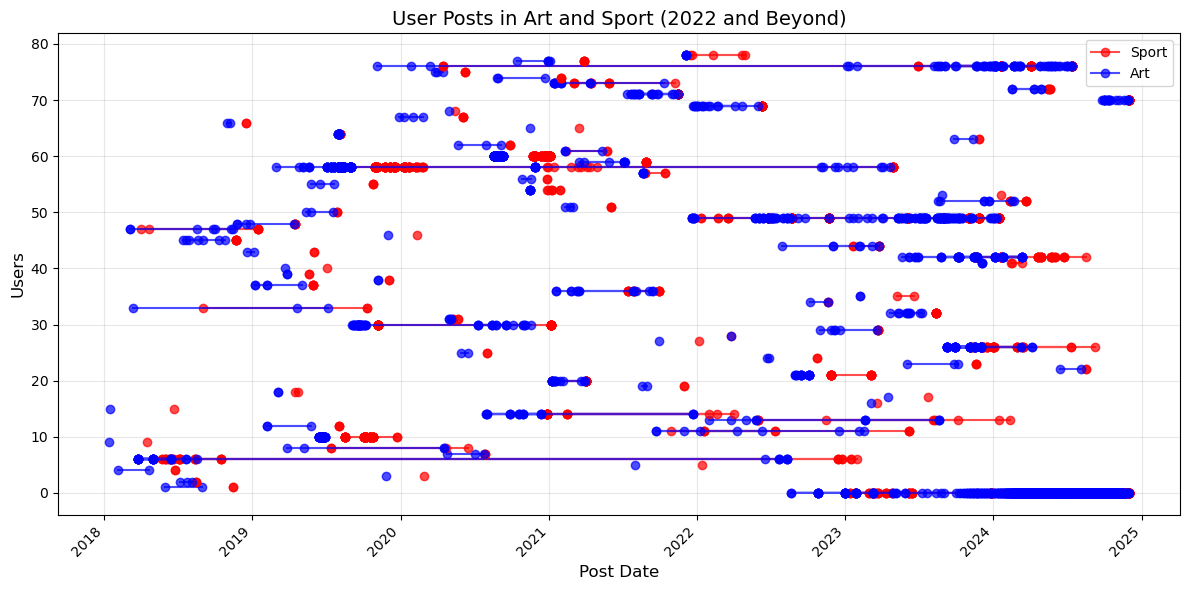

In [ ]:
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import pandas as pd
def make_hashable(d):
    """
    Convert a dictionary into a hashable form, handling nested dictionaries.
    """
    if isinstance(d, dict):
        return tuple((k, make_hashable(v)) for k, v in d.items())
    elif isinstance(d, list):
        return tuple(make_hashable(item) for item in d)
    else:
        return d

# Constants
cutoff_date = datetime(2018, 1, 1, tzinfo=timezone.utc)

# Process and filter data for users with posts in both art and sport within 2 months
user_timeline_data = {}
excel_data = []
sport_users = set(filtered_sport_posts.keys())
art_users = set(art_posts_dic.keys())
common_users = sport_users.intersection(art_users)

for user in common_users:
    sport_array = [
        datetime.fromtimestamp(post['created_utc'], tz=timezone.utc).date()
        for post in filtered_sport_posts[user]
        if datetime.fromtimestamp(post['created_utc'], tz=timezone.utc) >= cutoff_date
    ]
    sport_array_posts = [
        post for post in filtered_sport_posts[user]
        if datetime.fromtimestamp(post['created_utc'], tz=timezone.utc) >= cutoff_date
    ]
    art_array = [
        datetime.fromtimestamp(post['created_utc'], tz=timezone.utc).date()
        for post in art_posts_dic[user]
        if datetime.fromtimestamp(post['created_utc'], tz=timezone.utc) >= cutoff_date
    ]
    art_array_posts = [
        post for post in art_posts_dic[user]
        if datetime.fromtimestamp(post['created_utc'], tz=timezone.utc) >= cutoff_date
    ]
    MAX_TIME_DIFF = 180

    # Collect posts within 2 months difference
# Collect posts within 2 months difference
    matched_posts = []
     
    for sport_post in sport_array_posts:
        for art_post in art_array_posts:
            dif_days = (datetime.fromtimestamp(sport_post['created_utc'], tz=timezone.utc).date() - datetime.fromtimestamp(art_post['created_utc'], tz=timezone.utc).date()).days
            if sport_post is not None and art_post is not None and\
                   dif_days<= MAX_TIME_DIFF and dif_days>=0:
                matched_posts.append((sport_post, art_post))

    
    # Process only if there are matched posts
    if matched_posts and len(matched_posts) > 0:
        user_timeline_data[user] = {
            'matched_posts': matched_posts
        }
        # Convert matched sport and art posts to unique sets using hashable tuples
        sport_posts = set([make_hashable(sport_art_post[0]) for sport_art_post in matched_posts])
        art_posts = set([make_hashable(sport_art_post[1]) for sport_art_post in matched_posts])


        # Optional: Convert back to dictionaries if needed later
        sport_posts = [dict(post) for post in sport_posts]
        art_posts = [dict(post) for post in art_posts]

        # Find the maximum length of sport_posts and art_posts
        max_length = max(len(sport_posts), len(art_posts))

        # Iterate over the longest list and match posts
        for i in range(max_length):
            # Handle cases where there are fewer sport or art posts than max_length
            sport_post = sport_posts[i] if i < len(sport_posts) else {}
            art_post = art_posts[i] if i < len(art_posts) else {}
            
            # Append data to Excel, using .get() to safely access dictionary values
            excel_data.append({
                "User": user,
                "Art post id": art_post.get('post_id', ''),
                "Art Title": art_post.get('title', ''),
                "Art Description": art_post.get('description', ''),
                "Art Flair": art_post.get('flair', ''),
                "Art Subreddit": art_post.get('subreddit', ''),
                "Art Score": art_post.get('score', ''),
                "Art Created UTC": datetime.utcfromtimestamp(art_post['created_utc']) if 'created_utc' in art_post else '',
                
                "Sport post id": sport_post.get('post_id', ''),
                "Sport Title": sport_post.get('title', ''),
                "Sport Description": sport_post.get('description', ''),
                "Sport Flair": sport_post.get('flair', ''),
                "Sport Subreddit": sport_post.get('subreddit', ''),
                "Sport Score": sport_post.get('score', ''),
                "Sport Created UTC": datetime.utcfromtimestamp(sport_post['created_utc']) if 'created_utc' in sport_post else '',
            })
            
            
        
print(len(user_timeline_data))
# Convert the data to a DataFrame
df = pd.DataFrame(excel_data)

# Save the DataFrame to an Excel file
output_file = "user_posts_art_and_sport_only_sport_filter_all_posts.xlsx"
df.to_excel(output_file, index=False)


# Plot timeline
plt.figure(figsize=(12, 6))
for i, (user, data) in enumerate(user_timeline_data.items()):
    sport_times = [datetime.utcfromtimestamp(post[0]['created_utc']) for post in data['matched_posts']]
    art_times = [datetime.utcfromtimestamp(post[1]['created_utc']) for post in data['matched_posts']]
    
    # Plot sport posts
    plt.plot(
        sport_times, [i] * len(sport_times), 
        color='red', alpha=0.7, linestyle='-', marker='o', 
        label='Sport' if i == 0 else ""
    )

    # Plot art posts
    plt.plot(
        art_times, [i] * len(art_times), 
        color='blue', alpha=0.7, linestyle='-', marker='o', 
        label='Art' if i == 0 else ""
    )

# Enhance the plot
plt.title("User Posts in Art and Sport (2022 and Beyond)", fontsize=14)
plt.xlabel("Post Date", fontsize=12)
plt.ylabel("Users", fontsize=12)
plt.gcf().autofmt_xdate()  # Automatically format date labels
plt.xticks(fontsize=10, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()